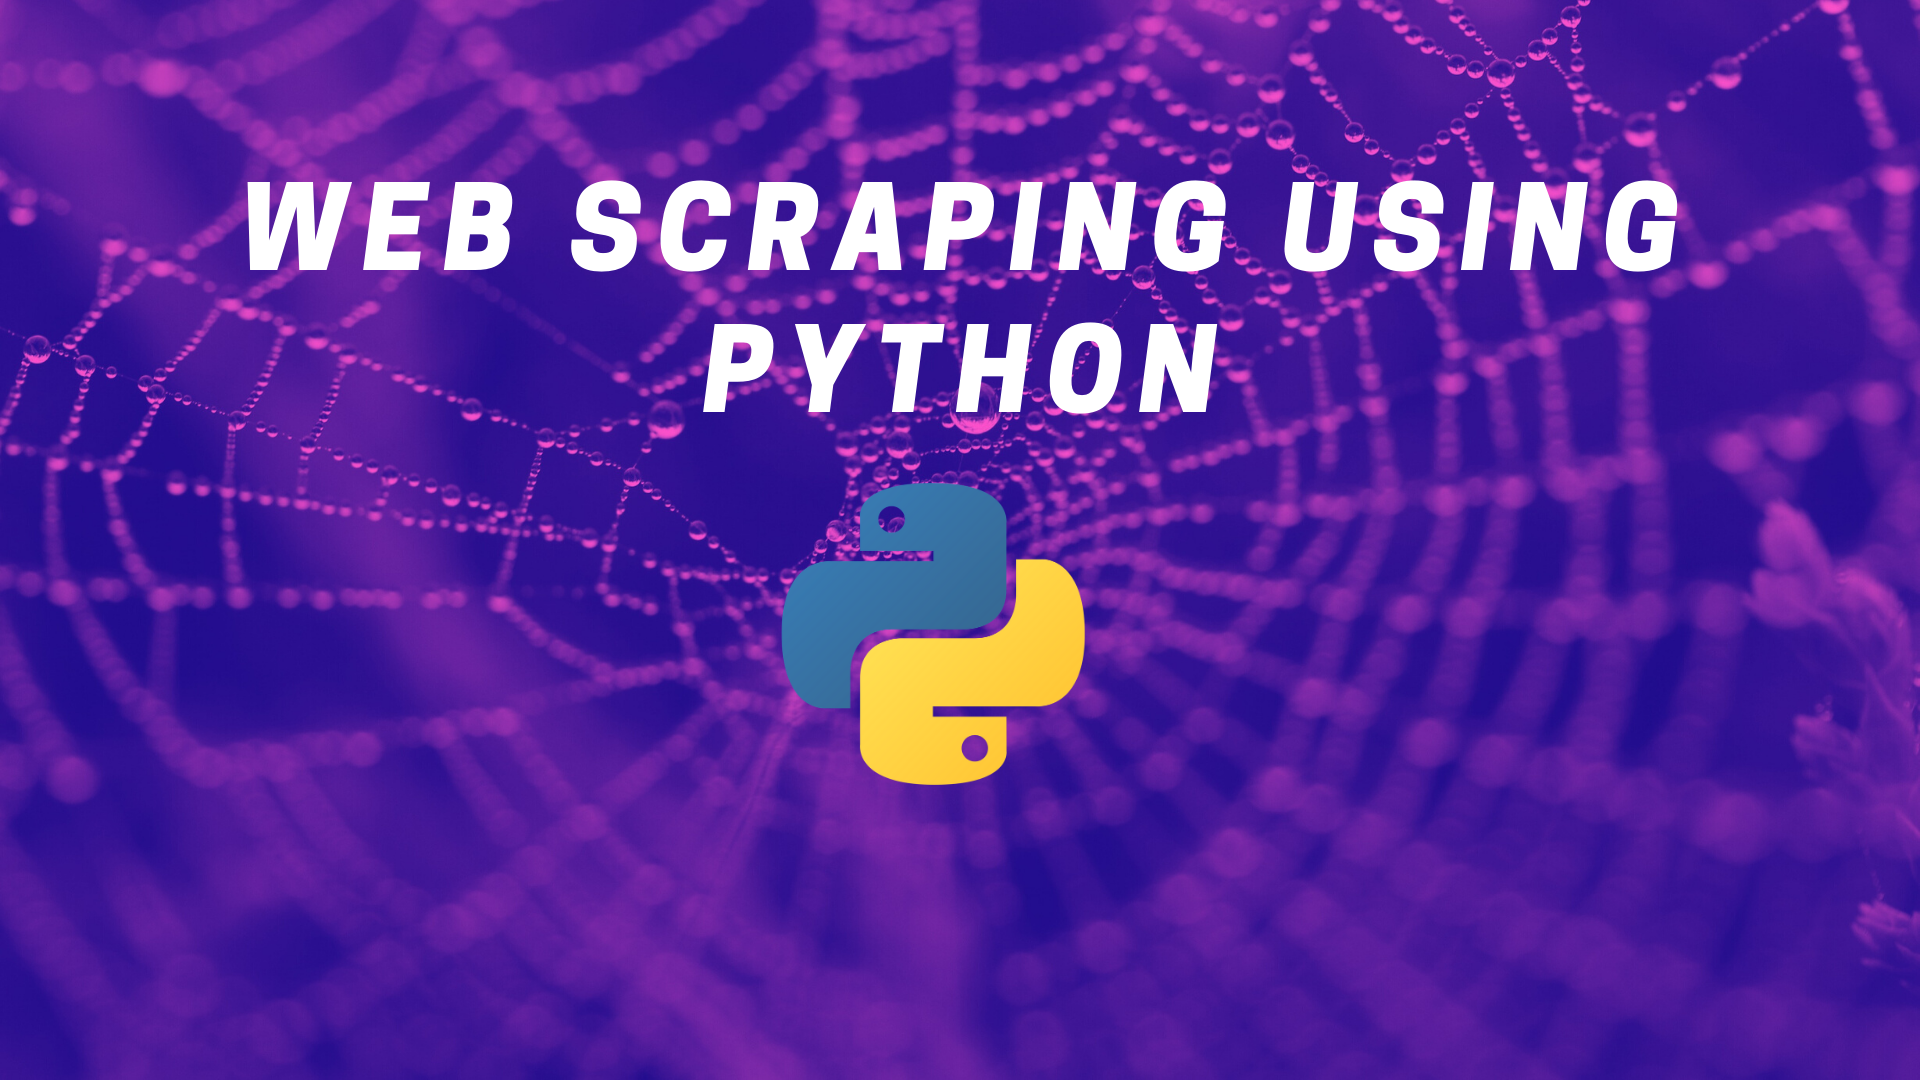

In [1]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests
import json
import warnings
warnings.filterwarnings("ignore")

Code to prevent crwaling blocking by creating IPs

In [2]:
l={}
u=list()
url= "https://www.proxynova.com/proxy-server-list/country-ISO 3166-2:IL/"
respo = requests.get(url).text
soup = BeautifulSoup(respo, "html.parser")
allproxy = soup.find_all("tr")
for proxy in allproxy:
    foo = proxy.find_all("td")
try: 
    l["ip"]=foo[0].text.replace("\n","").replace("document.write(","").replace(")","").replace("\'","").replace(";","")
except:
    l["ip"]=None
try:
    l["port"]=foo[1].text.replace("\n","").replace(" ","")
except:
    l["port"]=None
try:
    l["country"]=foo[5].text.replace("\n","").replace(" ","")
except:
    l["country"]=None
if(l["port"] is not None):
    u.append(l)
l={}
print(u)

[]


Open text file which include all animals pages

In [3]:
animals_links = []

with open('links_animals.txt', 'r') as f:
    animals_links = f.read().split('\n')

Request for each animal page

In [4]:
def get_animal_page(animal_url):
    
    response_animal = requests.get(animal_url)
    animal_soup = BeautifulSoup(response_animal.content, "html.parser")
    return animal_soup


Crawling all feature in every animal page:

* Category 1 & 2 - general information
* Category 3 & 4 - Geography information


In [5]:
def animal_crwaler(animal_soup):
    
    animal_info = {}
    
    
    """ General information 1 """
    
    tag_general_1 = animal_soup.find("div", attrs = {"class":"s-char-kinds"})
    gen_1_attr = [i.get_text().replace("\n", "").replace(" ", "")
                  for i in tag_general_1.findAll("div", attrs = {"class":"s-char-kinds__attr"})]
    gen_1_names = [j['href'].replace("/", "") for j in tag_general_1.findAll('a')]
    gen_1_names.append(tag_general_1.find("div", attrs
                                          = {"class":"col-8 s-char-kinds__name unactive"}).text.replace("\n",
                                                                                                        "").replace("  ", ""))
    
    for i in range(0, len(gen_1_attr)):
        animal_info[gen_1_attr[i]] = gen_1_names[i]
        
        
        
    """ General information 2 """
    
    try:
        tag_general_2 = animal_soup.find("div", attrs = {"class":"s-char-char s-char-char-custom"})
    except:
        print("wrong")
    else:
        tag_general_2 = animal_soup.find("div", attrs = {"class":"s-char-char"})
        
    gen_2_attr = [i.get_text() for i in tag_general_2.findAll("div", attrs = {"class":"s-char-char__name"})]
    gen_2_names = [i.get_text() for i in tag_general_2.findAll("div", attrs = {"class":"s-char-char__num"})]
    
    for i in range(0, len(gen_2_attr)):
        animal_info[gen_2_attr[i]] = gen_2_names[i]
        
    
    
    """ Geography information """    
    
    try:
        tag_continents = animal_soup.find("div", attrs = {"class":"col-sm-10"})
        cont_attr = [j.get_text().replace(", ", "") for j in tag_continents.findAll('a')]
        animal_info["Continents"] = cont_attr
    except:
        animal_info["Continents"] = "All"
    
    try:
        tag_climate = animal_soup.find("div", attrs = {"class":"s-distr-climate"})
        climate_attr = [j.text.replace("\\", "/") for j in tag_climate.findAll('span')]
        animal_info["Climate"] = climate_attr
    except:
        animal_info["Climate"] = None
    
    
    
    """ Nutrition information """
    
    try:
        tag_diet = animal_soup.find("div", attrs = {"class":"s-diet-item"})
        diet_attr = [j['href'].replace("/", "") for j in tag_diet.findAll('a')]
        animal_info["Diet"] = diet_attr
    except:
        animal_info["Diet"] = None
    
    
    """ Lifestyle information """
    
    try:
        tag_life = animal_soup.findAll("div", attrs = {"class":"col-sm-9"})
        try:
            life_attr = [j.text for j in tag_life[1].findAll('a')]
        except:
            life_attr = [j.text for j in tag_life[0].findAll('a')]

        animal_info["Lifestyle"] = life_attr
    except:
        animal_info["Lifestyle"] = None
    
    """ Mating Habits information """
    
    tag_mate = animal_soup.find("div", attrs = {"class":"s-mating-descr"})
    mate_attr = [i.get_text() for i in tag_mate.findAll("div", attrs = {"class":"s-mating-slug__text"})]
    mate_data = [j.get_text() for j in tag_mate.findAll("div", attrs = {"class":"s-mating-char__text"})]
    
    try:
        mate_name = tag_mate.find("a").text
        animal_info[mate_attr[0]] = mate_name
        for i in range(0, len(mate_data)):
            animal_info[mate_attr[i + 1]] = mate_data[i]
    except:
        for i in range(0, len(mate_data)):
            animal_info[mate_attr[i]] = mate_data[i]
        
    
    
    """ Population information """
    
    tag_popul = animal_soup.findAll("div", attrs = {"class":"s-population-link"})
    try:
        trend_attr = tag_popul[0].find('a').text
        animal_info["Trend"] = trend_attr
    except:
        animal_info["Trend"] = None
        
    try:
        stat_attr = tag_popul[1].find('a').text
        animal_info["Status"] = stat_attr
    except:
        animal_info["Status"] = None
        
    
        
    return animal_info

In [6]:
all_animals_attr = []
error_animals = []

for animal_link in animals_links:
    try:
        animal_soup = get_animal_page(animal_link)
        all_animals_attr.append(animal_crwaler(animal_soup))
    except:
        error_animals.append(animal_link)

In [7]:
print(len(all_animals_attr))
print(len(error_animals))

1589
9


In [8]:
error_animals

['http://animalia.bio/wisent',
 'http://animalia.bio/bactrian-deer',
 'http://animalia.bio/uinta-ground-squirrel',
 'http://animalia.bio/lhoests-monkey',
 'http://animalia.bio/black-capped-squirrel-monkey',
 'http://animalia.bio/red-lemur',
 'http://animalia.bio/red-bellied-lemur',
 'http://animalia.bio/black-capuchin',
 '']

Saving all animals attributes' list as a text file

In [9]:
json_str = json.dumps(all_animals_attr)

with open('animals_info.txt', 'w') as f:
    f.write(json_str)